# Lab 1

by Vsevolod Klyushev

## Task 1

First of all, let's define the following things:
- $g(x_1, x_2, \dots, x_{dim}) = g(\hat x)$ is $\mathbb{R^{dim}}\rightarrow \mathbb{R}$
- $x$ is choosen i.i.d. according to multivariance uniform distribution (as in lecture)
- Approximation is defined as $\frac{1}{N}\sum_{i=1}^N g(\hat x_i)$, where $\hat x_i \in \mathbb{R}^{dim}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def integral_approximation(g, a, b, dim, n):
    # first gernerate points independently and identically according to the multivariate uniform distribution (as in lectures)
    xs = [np.random.uniform(low=a, high=b, size=dim) for _ in range(n)]
    # our approximation is just mean of values from given function
    approximation = 1/n * np.sum([g(x) for x in xs])
    return approximation
    
def calculate_var(vals):
    # we need variance to calculate RMSE later
    mean = sum(vals) / len(vals)
    return sum([(val - mean)**2 for val in vals]) / len(vals)

def performs_approximations(g, a, b, dim, n, N=10):
    # In order to compute error, we need to perform several experiments with same parameteres. However, as fnial output I decided to use mean of our calculated expectations.
    approximations = [integral_approximation(g, a, b, dim, n) for _ in range(N)]
    final_approximation = sum(approximations) / N
    RMSE = np.sqrt(1/n * calculate_var(approximations))
    return final_approximation, RMSE


# Task 2

In [2]:
def g(x):
    return sum(x)**2

def Integral(dim):
    return dim/12

def test_for_dim(dim, max_n=1000, func=g, a=-1/2, b=1/2, N=10, I=Integral):
    vals = []
    errors = []
    ns = range(1, max_n)
    for n in ns:
        val, err = performs_approximations(func, a, b, dim, n, N)
        vals.append(val)
        errors.append(err)
    I_plot = np.array([I(dim) for _ in range(len(vals))])

    fig, axes = plt.subplots(2, 1, figsize=(16, 9))
    axes[0].plot(ns, vals, label=r"$\frac{1}{N}\sum_i g(x_i)$")
    axes[0].plot(ns, I_plot, label="I")
    axes[0].grid(True)
    axes[0].set_title('value vs N')
    axes[0].set_xlabel("N")
    axes[0].set_ylabel("Value")
    axes[0].legend(loc="upper left")

    axes[1].plot(ns, errors, label="RMSE")
    axes[1].grid(True)
    axes[1].set_title('RMSE vs N')
    axes[1].set_xlabel("N")
    axes[1].set_ylabel("RMSE")
    axes[1].legend(loc="upper left")
    plt.tight_layout
    fig.suptitle(f"Approximation for dim={dim}")
    plt.show()

As you can see, we with increase of N we converge to real Integral value closer and closer up to some precision. Also the higher the dimentionalite, the higher is the RMSE for the same number of experiments (N)

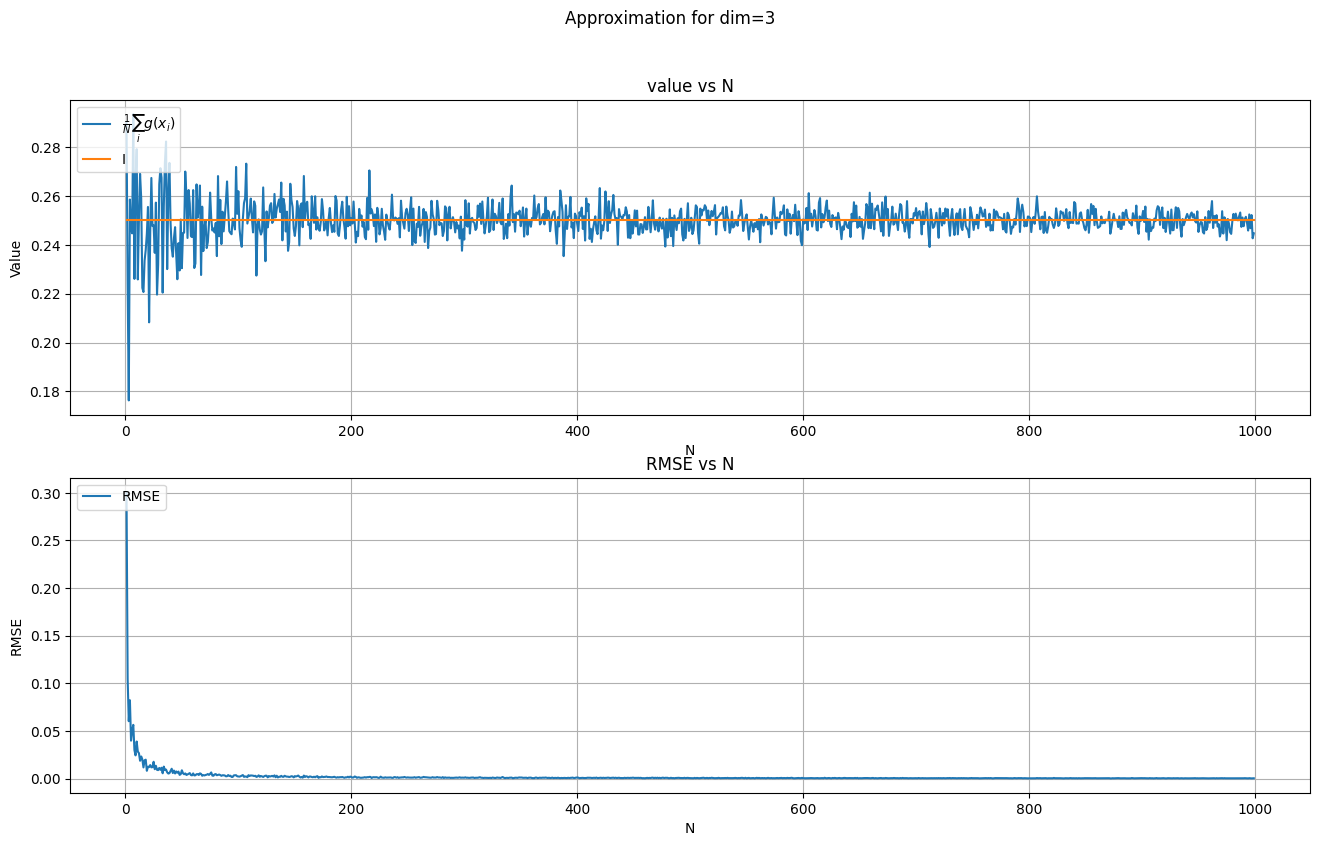

In [3]:
test_for_dim(3)

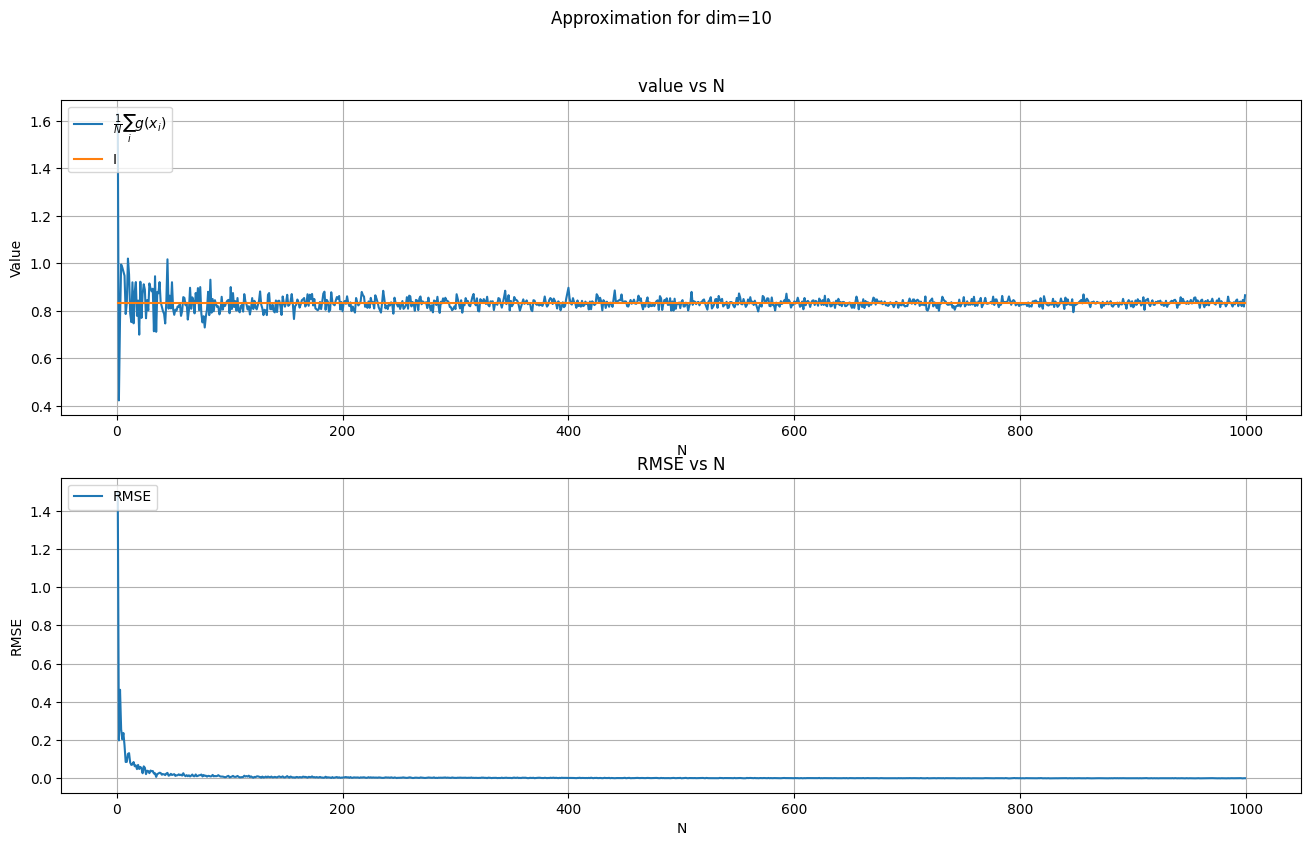

In [4]:
test_for_dim(10)

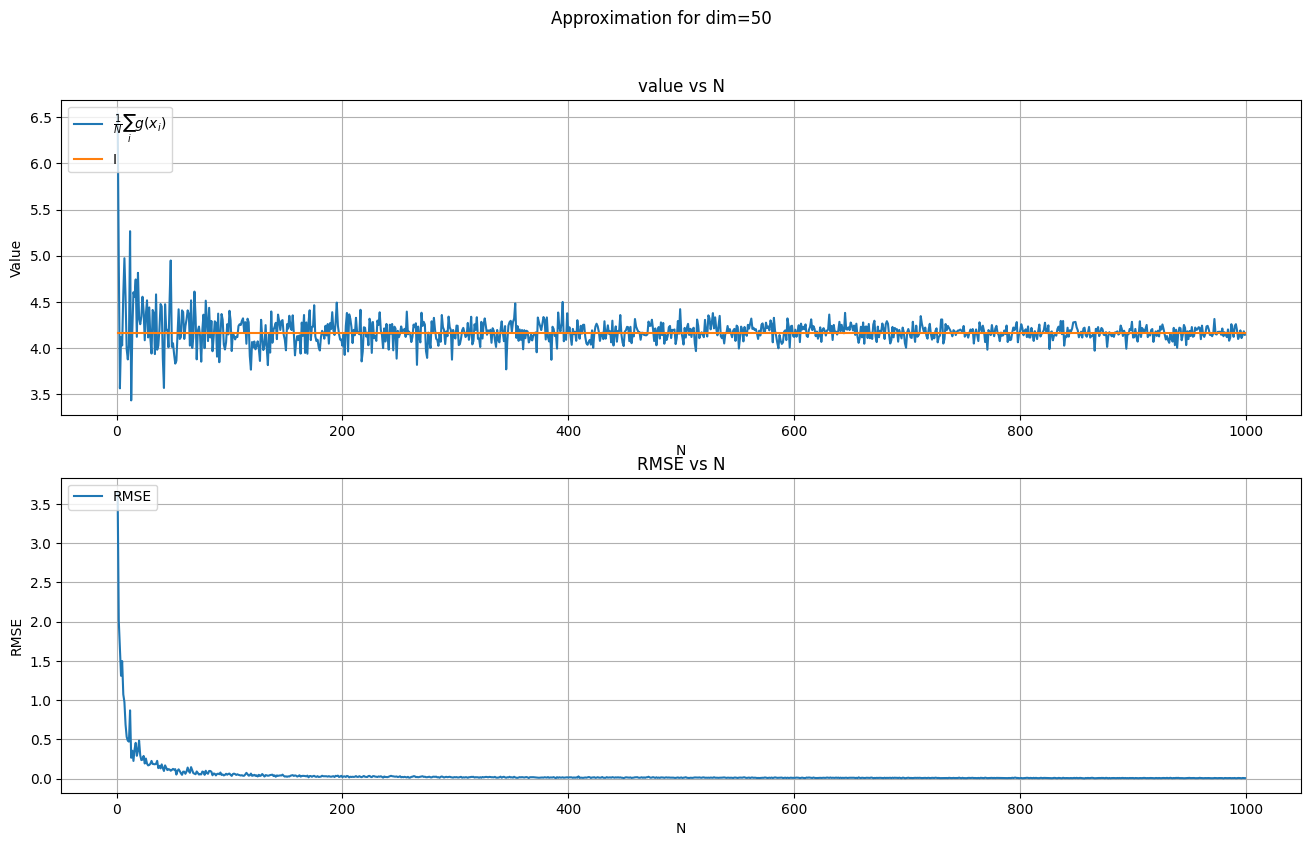

In [5]:
test_for_dim(50)

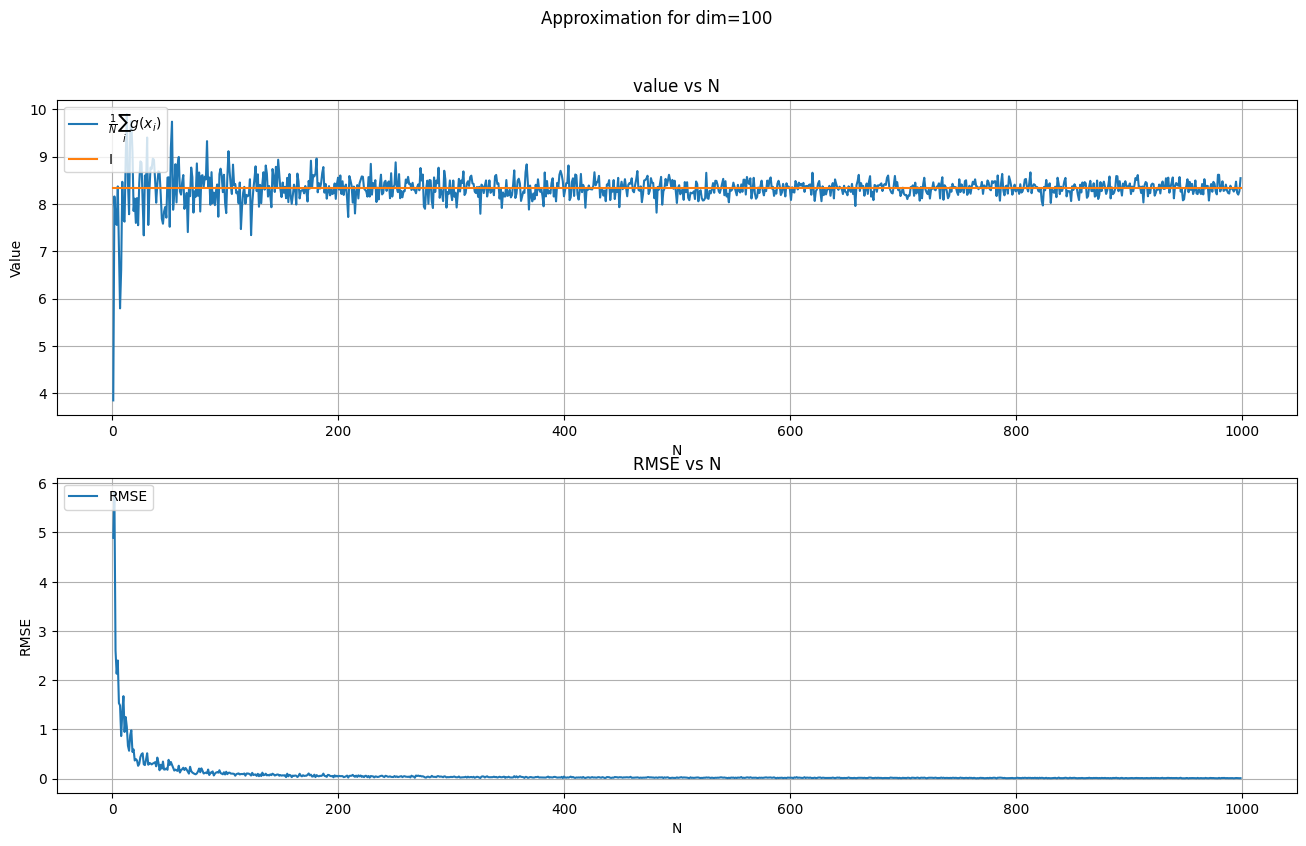

In [6]:
test_for_dim(100)